<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Analizando el Delito en Chicago

En este caso-taller vamos a utilizar datos geográficos y estimación de densidad de kernel para analizar delitos en Chicago. Esta ciudad es muy famosa no sólo por haber sido el hogar del mafioso Al Capone, sino también por sus altas tasas de delitos. 

Para este taller obtuve datos del portal de la [ciudad de Chicago](https://www.chicago.gov/city/en/dataset/crime.html). La base de datos fue traducida y modificada para nuestras necesidades. Esta contiene todos los homicidios y robos que sucedieron entre el 1 de junio y el 31 de agosto de 2019.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

#### 1.1. Delitos

En la carpeta `data` se encuentra el archivo `Chicago_delitos_verano_2019.csv` cargue estos datos en su *cuaderno*. Describa brevemente el contenido de la base.

In [237]:
#Cargamos las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargamos los datos:
delitos = pd.read_csv('data\Chicago_delitos_verano_2019.csv')
delitos.head()

<>:7: DeprecationWarning: invalid escape sequence \C
<>:7: DeprecationWarning: invalid escape sequence \C
C:\Users\fcalv\AppData\Local\Temp\ipykernel_23944\1307719584.py:7: DeprecationWarning: invalid escape sequence \C
  delitos = pd.read_csv('data\Chicago_delitos_verano_2019.csv')


fecha tipo_crimen  nro_area_comunitaria        lat  \
0  2019-06-01T05:07:00Z   homicidio                    23  41.897950   
1  2019-06-01T10:09:00Z   homicidio                    71  41.753272   
2  2019-06-01T12:46:00Z   homicidio                    25  41.877622   
3  2019-06-01T11:35:00Z   homicidio                    16  41.960145   
4  2019-06-02T09:39:00Z   homicidio                    37  41.804773   

         lon  
0 -87.728625  
1 -87.648963  
2 -87.750728  
3 -87.699654  
4 -87.633256

In [238]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17747 entries, 0 to 17746
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 17747 non-null  object 
 1   tipo_crimen           17747 non-null  object 
 2   nro_area_comunitaria  17747 non-null  int64  
 3   lat                   17747 non-null  float64
 4   lon                   17747 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 693.4+ KB


In [239]:
delitos.describe()

nro_area_comunitaria           lat           lon
count          17747.000000  17747.000000  17747.000000
mean              32.066546     41.863417    -87.665045
std               21.440824      0.081835      0.054962
min                1.000000     41.644608    -87.917645
25%               14.000000     41.795991    -87.696735
50%               28.000000     41.883500    -87.654829
75%               44.000000     41.917239    -87.627813
max               77.000000     42.022536    -87.525645

(Utilice este espacio para describir su procedimiento)

#### 1.2. Barrios de Chicago

También en la carpeta `data` se encuentran los archivos con los polígonos de las áreas comunitarias en un archivo comprimido llamado `Areas_comunitarias_Chicago.zip`. Genere un mapa interactivo con un popup con el nombre del area comunitaria.

In [240]:
#Cargamos geopandas que es la librería a utilizar
import geopandas as gpd

#Cargamos los datos de establecimientos
areas_comunitarias = gpd.read_file("data/Areas_comunitarias_Chicago") 


areas_comunitarias.head()

area area_num_1 area_numbe  comarea  comarea_id        community  \
0   0.0         35         35      0.0         0.0          DOUGLAS   
1   0.0         36         36      0.0         0.0          OAKLAND   
2   0.0         37         37      0.0         0.0      FULLER PARK   
3   0.0         38         38      0.0         0.0  GRAND BOULEVARD   
4   0.0         39         39      0.0         0.0          KENWOOD   

   perimeter    shape_area     shape_len  \
0        0.0  4.600462e+07  31027.054510   
1        0.0  1.691396e+07  19565.506153   
2        0.0  1.991670e+07  25339.089750   
3        0.0  4.849250e+07  28196.837157   
4        0.0  2.907174e+07  23325.167906   

                                            geometry  
0  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  
1  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  
2  POLYGON ((-87.6288 41.80189, -87.62879 41.8017...  
3  POLYGON ((-87.60671 41.81681, -87.6067 41.8165...  
4  POLYGON ((-87.59215 41.81693, -87.59215 41.816...

In [241]:
#importamos la librería
import folium

#Mapa base
map = folium.Map(location = [41.863417,-87.665045], tiles = "OpenStreetMap", zoom_start = 10)


for _, r in areas_comunitarias.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map)

map

(Utilice este espacio para describir su procedimiento).

### 2.   Análisis distribución del crimen por barrios

#### 2.1.  Genere una tabla descriptiva donde se muestra el número total de delitos, el número total de robos y el número total de homicidios, y como porcentaje de total por barrios. La tabla debe contener ademas una fila final donde se muestre el total para la ciudad. Describa los resultados que obtiene.


In [242]:
# Contar el total de delitos por barrio
total_delitos_por_barrio = delitos.groupby('nro_area_comunitaria').size().reset_index(name='Total delitos')

# Contar el número de robos y homicidios por barrio
robos_por_barrio = delitos[delitos['tipo_crimen'] == 'robo'].groupby('nro_area_comunitaria').size().reset_index(name='Robos')
homicidios_por_barrio = delitos[delitos['tipo_crimen'] == 'homicidio'].groupby('nro_area_comunitaria').size().reset_index(name='Homicidios')

# Unir las tablas
tabla_final = total_delitos_por_barrio.merge(robos_por_barrio, on='nro_area_comunitaria', how='left')
tabla_final = tabla_final.merge(homicidios_por_barrio, on='nro_area_comunitaria', how='left')

# Llenar valores NaN con 0 si algún barrio no tiene robos o homicidios
tabla_final.fillna(0, inplace=True)

# Calcular los porcentajes
tabla_final['% Robo'] = (tabla_final['Robos'] / tabla_final['Total delitos'])
tabla_final['% Homicidio'] = (tabla_final['Homicidios'] / tabla_final['Total delitos']) 

# Calcular totales para la ciudad
totales_ciudad = tabla_final[['Total delitos', 'Robos', 'Homicidios']].sum()
totales_ciudad['nro_area_comunitaria'] = 'Total Ciudad'
totales_ciudad['% Robo'] = (totales_ciudad['Robos'] / totales_ciudad['Total delitos']) 
totales_ciudad['% Homicidio'] = (totales_ciudad['Homicidios'] / totales_ciudad['Total delitos']) 

# Agregar la fila de totales a la tabla final
tabla_final = tabla_final.append(totales_ciudad, ignore_index=True)

# Mostrar la tabla
tabla_final


C:\Users\fcalv\AppData\Local\Temp\ipykernel_23944\1344610792.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla_final = tabla_final.append(totales_ciudad, ignore_index=True)


nro_area_comunitaria  Total delitos    Robos  Homicidios    % Robo  \
0                     1          377.0    375.0         2.0  0.994695   
1                     2          280.0    280.0         0.0  1.000000   
2                     3          266.0    266.0         0.0  1.000000   
3                     4          169.0    169.0         0.0  1.000000   
4                     5           99.0     99.0         0.0  1.000000   
..                  ...            ...      ...         ...       ...   
73                   74           21.0     21.0         0.0  1.000000   
74                   75          124.0    124.0         0.0  1.000000   
75                   76          163.0    163.0         0.0  1.000000   
76                   77          228.0    228.0         0.0  1.000000   
77         Total Ciudad        17747.0  17603.0       144.0  0.991886   

    % Homicidio  
0      0.005305  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
73     0.000000  
74     0.000000  
75     0.000000  
76     0.000000  
77     0.008114  

[78 rows x 6 columns]

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

#### 2.2. Genere una gráfica de dispersión entre el total de homicidios y robos por barrios. Incluya en la gráfica la recta de regresión que mejor ajusta a esos datos. Describa los resultados que obtiene.

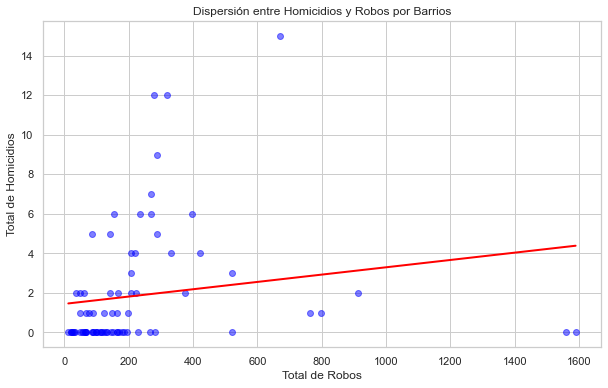

In [243]:
import matplotlib.pyplot as plt
import numpy as np

# Asumimos que 'tabla_final' es el DataFrame obtenido del paso anterior y ya incluye los datos necesarios
# Eliminamos la fila de totales para la gráfica
tabla_final = tabla_final[tabla_final['nro_area_comunitaria'] != 'Total Ciudad']

# Datos para la gráfica
x = tabla_final['Robos']
y = tabla_final['Homicidios']

# Calcular la recta de regresión
coeficientes = np.polyfit(x, y, 1)  # Esto nos da los coeficientes de la línea (pendiente, intersección)
polinomio = np.poly1d(coeficientes)

# Generar valores x para la línea de regresión
x_linea = np.linspace(min(x), max(x), 100)

# Generar valores y usando la recta de regresión
y_linea = polinomio(x_linea)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue')  # Gráfica de dispersión
plt.plot(x_linea, y_linea, color='red', linewidth=2)  # Línea de regresión
plt.title('Dispersión entre Homicidios y Robos por Barrios')
plt.xlabel('Total de Robos')
plt.ylabel('Total de Homicidios')
plt.grid(True)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 3. Distribución espacial del delito

#### 3.1 Distribución respecto al centro de la ciudad

Tomando como centro de la ciudad las coordenadas (-87.627800, 41.881998), estime funciones de densidad que muestren gráficamente el gradiente del total de robos, y homicidios, como función de la distancia al centro de la ciudad. Explique cómo midió las distancias incluyendo que medida de distancia utilizó. Para elegir el ancho de banda y la función de kernel más apropiados utilice validación cruzada usando todas las opciones posibles de kernel. Describa los resultados que obtiene.

In [244]:
from geopy.distance import geodesic

# Función para calcular la distancia usando geodesic
def calcular_distancia(row):
    delito_coord = (row['lat'], row['lon'])
    return geodesic(delito_coord, (-87.627800, 41.881998)).kilometers

# Aplicar la función a cada fila del DataFrame de delitos
delitos['distancia_centro'] = delitos.apply(calcular_distancia, axis=1)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


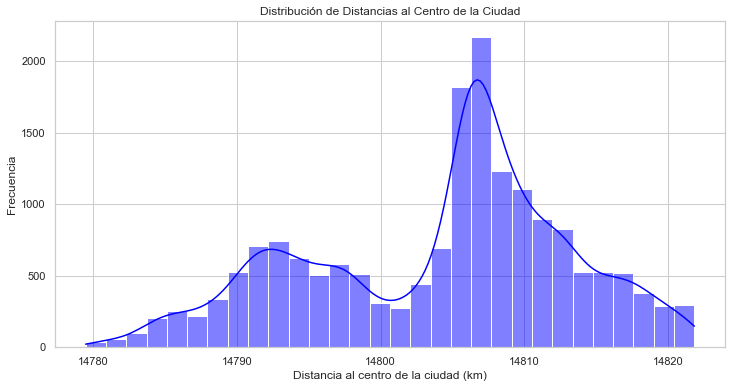

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'distancia_centro' está en tu DataFrame y correctamente calculada
# Esto supone que 'delitos' es tu DataFrame y 'distancia_centro' es la columna con las distancias

# Configuración para mejorar la apariencia de los gráficos
sns.set(style="whitegrid")

# Crear una figura con tamaño definido
plt.figure(figsize=(12, 6))

# Crear un histograma con la estimación KDE
sns.histplot(delitos['distancia_centro'], bins=30, kde=True, color="blue")

# Agregar títulos y etiquetas
plt.title('Distribución de Distancias al Centro de la Ciudad')
plt.xlabel('Distancia al centro de la ciudad (km)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Preparar los datos para KDE
X = delitos['distancia_centro'].values[:, np.newaxis]

# Calculando el ancho de banda según Scott
scott_bandwidth = np.power(len(X), -1. / (X.shape[1] + 4)) * X.std()

# Definir un rango de anchos de banda para probar alrededor del valor de Scott
bandwidth_range = np.linspace(scott_bandwidth * 0.5, scott_bandwidth * 2, 20)

# Configuración de GridSearchCV usando el rango basado en Scott
params = {
    'bandwidth': bandwidth_range,
    'kernel': ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
}

# Inicializar y ejecutar la búsqueda por cuadrícula con validación cruzada
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(X)

# Mejor modelo encontrado
kde_best = grid.best_estimator_

# Puntos para evaluación de la densidad: usando todo el rango de datos
x_d = np.linspace(X.min(), X.max(), len(X))[:, np.newaxis]
log_dens = kde_best.score_samples(x_d)

In [29]:
# Mostrar el ancho de banda y kernel del mejor modelo
print("Mejor ancho de banda:", grid.best_params_['bandwidth'])
print("Mejor kernel:", grid.best_params_['kernel'])

Mejor ancho de banda: 0.6477320160806738
Mejor kernel: linear


In [26]:
from joblib import dump

# Guardar el modelo en un archivo
dump(kde_best, 'mejor_modelo_kde.joblib')

['mejor_modelo_kde.joblib']

In [246]:
from joblib import load

# Cargar el modelo desde el archivo
kde = load('mejor_modelo_kde.joblib')

# Utilizar el modelo cargado para realizar predicciones o evaluaciones
# Por ejemplo, evaluar en los mismos puntos x_d usados anteriormente
log_dens = kde.score_samples(x_d)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


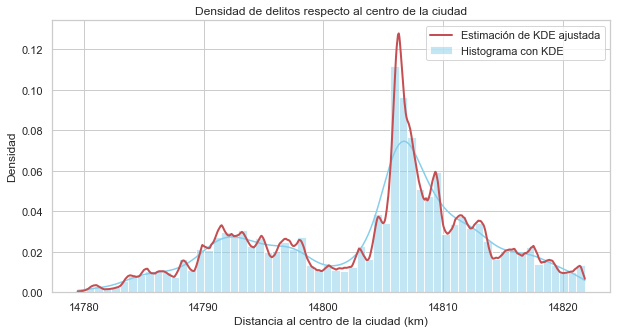

In [247]:
# Configuración de estilo para una mejor apariencia
sns.set(style="whitegrid")

# Supongamos que 'X' ya está definido como tus datos de entrada para KDE
# x_d y log_dens también se suponen ya calculados

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Primero, graficar el histograma con densidad KDE
sns.histplot(delitos['distancia_centro'], bins=60, kde=True, color='skyblue', stat="density", label='Histograma con KDE')

# Ahora, añadir la línea de KDE basada en los resultados de GridSearchCV o cálculo personalizado
plt.plot(x_d[:, 0], np.exp(log_dens), 'r-', label='Estimación de KDE ajustada', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Distancia al centro de la ciudad (km)')
plt.ylabel('Densidad')
plt.title('Densidad de delitos respecto al centro de la ciudad')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 3.2 Puntos calientes en la ciudad

Usando `statsmodels` implemente la estimación de densidad bivariada para el total de robos y el total de homicidios. Muestre los resultados usando curvas de nivel en una visualización interactiva. Compare los resultados de estimar usando los anchos de banda: `normal_reference` y `cv_ml`. Explique en que consisten ambas formas de estimar el ancho de banda. Comente sobre los puntos calientes encontrados bajo ambos métodos y su ubicación en la ciudad. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [248]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.io import output_notebook
output_notebook() 

# Suponiendo que 'tabla_final' es tu DataFrame y tiene columnas 'Robos' y 'Homicidios'
X = tabla_final[['Robos', 'Homicidios']].values

# Eliminar cualquier fila con NaN que pueda afectar la estimación de densidad
X = X[~np.isnan(X).any(axis=1)]

# Estimación de la densidad bivariada usando normal_reference
kde_nr = sm.nonparametric.KDEMultivariate(data=X, var_type='cc', bw='normal_reference')

# Estimación de la densidad bivariada usando cv_ml
kde_cv_ml = sm.nonparametric.KDEMultivariate(data=X, var_type='cc', bw='cv_ml')

# Creando una grilla para evaluar las funciones de densidad
xmin, xmax = 0, X[:, 0].max() + 1
ymin, ymax = 0, X[:, 1].max() + 1
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
f_nr = np.reshape(kde_nr.pdf(positions.T), xx.shape)
f_cv_ml = np.reshape(kde_cv_ml.pdf(positions.T), xx.shape)

# Generar curvas de nivel para normal_reference
CS_nr = plt.contour(xx, yy, f_nr, levels=10)
plt.close()

# Generar curvas de nivel para cv_ml
CS_cv_ml = plt.contour(xx, yy, f_cv_ml, levels=10)
plt.close()

# Función para extraer los datos de las curvas de nivel generadas por Matplotlib
def extract_contour_lines(contour_set):
    lines = []
    for i, level in enumerate(contour_set.levels):
        for seg in contour_set.allsegs[i]:
            lines.append({
                'x': seg[:, 0],
                'y': seg[:, 1],
                'level': level
            })
    return lines

# Extraer las líneas de las curvas de nivel para ambos métodos
lines_nr = extract_contour_lines(CS_nr)
lines_cv_ml = extract_contour_lines(CS_cv_ml)

# Crear gráficos interactivos con Bokeh
p1 = figure(title="Densidad de Delitos - Normal Reference", tools="pan,wheel_zoom,box_zoom,reset,save,hover")
p2 = figure(title="Densidad de Delitos - CV ML", tools="pan,wheel_zoom,box_zoom,reset,save,hover")

# Añadir las líneas de las curvas de nivel al gráfico de Bokeh
for line in lines_nr:
    p1.line(line['x'], line['y'], line_color='blue', line_width=1.5, legend_label=f'Level: {line["level"]:.2f}')

for line in lines_cv_ml:
    p2.line(line['x'], line['y'], line_color='red', line_width=1.5, legend_label=f'Level: {line["level"]:.2f}')

# Sincronizar los rangos de ambos gráficos
p1.x_range = p2.x_range
p1.y_range = p2.y_range
p1.legend.click_policy = p2.legend.click_policy = "hide"

# Mostrar los gráficos lado a lado en Jupyter Notebook
show(row(p1, p2))

Loading BokehJS ...

In [249]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import geopandas as gpd
import pyproj
from shapely.ops import transform

# Asegúrate de que el GeoDataFrame está en la proyección correcta
print("CRS actual:", areas_comunitarias.crs)

# Si el CRS es en formato WGS84 (lat/long) y no es EPSG:3857, convertirlo a Mercator (EPSG:3857)
if areas_comunitarias.crs != "EPSG:3857":
    # Establecer el CRS a WGS84 LatLong si no está definido
    if areas_comunitarias.crs is None:
        areas_comunitarias.set_crs("EPSG:4326", inplace=True)  # WGS84 LatLong
    
    # Intentar transformar a Mercator
    try:
        areas_comunitarias = areas_comunitarias.to_crs(epsg=3857)
        print("Transformación a EPSG:3857 completada.")
    except Exception as e:
        print("Error en la transformación:", e)

# Verificar nuevamente después de la transformación
print("CRS final:", areas_comunitarias.crs)
    
# Ajustar la KDE usando normal_reference y cv_ml para los datos de robos y homicidios
kde_nr = KDEMultivariate(data=[tabla_final['Robos'], tabla_final['Homicidios']], var_type='cc', bw='normal_reference')
kde_cv_ml = KDEMultivariate(data=[tabla_final['Robos'], tabla_final['Homicidios']], var_type='cc', bw='cv_ml')

# Preparar los puntos de evaluación como un array de numpy
eval_points = np.vstack([tabla_final['Robos'], tabla_final['Homicidios']]).T

# Evaluar las densidades en los mismos datos utilizados para el ajuste
f_nr = kde_nr.pdf(eval_points)
f_cv_ml = kde_cv_ml.pdf(eval_points)


# Asegúrate de que el GeoDataFrame y el DataFrame están listos para ser utilizados
areas_comunitarias['density_nr'] = f_nr  # Asumiendo que f_nr es una lista o serie con la densidad por área
areas_comunitarias['density_cv_ml'] = f_cv_ml  # Asumiendo que f_cv_ml es una lista o serie con la densidad por área

from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.models import LinearColorMapper, ColorBar ,HoverTool
from bokeh.palettes import Viridis256 as palette

# Convertir el GeoDataFrame a un GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=areas_comunitarias.to_json())

# Configurar el mapper de color para la densidad
color_mapper = LinearColorMapper(palette=palette, low=areas_comunitarias['density_nr'].min(), high=areas_comunitarias['density_nr'].max())

# Crear un objeto de figura
p = figure(title="Densidad de Delitos por Barrio con normal_reference", tools="pan,wheel_zoom,box_zoom,reset,hover,save")

from bokeh.tile_providers import CARTODBPOSITRON, get_provider

tile_provider = get_provider(CARTODBPOSITRON)

p.add_tile(tile_provider)

# Añadir HoverTool al gráfico
p.add_tools(HoverTool(tooltips=[
    ("community", "@community")  # Asegúrate de que 'nombre_barrio' corresponde al nombre de la columna en el GeoJSON
]))

# Añadir los polígonos al gráfico
p.patches('xs', 'ys', source=geo_source,
          fill_color={'field': 'density_nr', 'transform': color_mapper},
          fill_alpha=0.7, line_color="black", line_width=0.5)

# Añadir una barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0))
p.add_layout(color_bar, 'right')

# Mostrar el mapa
show(p)

CRS actual: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Transformación a EPSG:3857 completada.
CRS final: EPSG:3857


In [250]:
# Configurar el mapper de color para la densidad
color_mapper = LinearColorMapper(palette=palette, low=areas_comunitarias['density_cv_ml'].min(), high=areas_comunitarias['density_cv_ml'].max())

# Crear un objeto de figura
p = figure(title="Densidad de Delitos por Barrio con cv_ml", tools="pan,wheel_zoom,box_zoom,reset,hover,save")

tile_provider = get_provider(CARTODBPOSITRON)

p.add_tile(tile_provider)

# Añadir HoverTool al gráfico
p.add_tools(HoverTool(tooltips=[
    ("community", "@community")  # Asegúrate de que 'nombre_barrio' corresponde al nombre de la columna en el GeoJSON
]))

# Añadir los polígonos al gráfico
p.patches('xs', 'ys', source=geo_source,
          fill_color={'field': 'density_cv_ml', 'transform': color_mapper},
          fill_alpha=0.7, line_color="black", line_width=0.5)

# Añadir una barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0))
p.add_layout(color_bar, 'right')

# Mostrar el mapa
show(p)

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

## 4. Explicando la ubicación del delito

El objetivo de este punto es encontrar posibles correlaciones  entre el crimen y características de la ciudad. Para ello, utilice los datos de OpenStreetMap y explore si existe una correlación entre el porcentaje del área de la comunidad  dedicado a tiendas (`retail`)  y comercios (`commercial`) y el número total de robos y homicidios en esa comunidad. Ofrezca una explicación intuitiva de por qué cree que aparecen estas correlaciones. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [251]:
import geopandas as gpd
import osmnx as ox

# Asumiendo que ya has descargado los datos como se mencionó en mensajes anteriores
place_name = "Chicago, Illinois, USA"
commercial = ox.geometries_from_place(place_name, tags={'landuse': 'commercial'})
retail = ox.geometries_from_place(place_name, tags={'landuse': 'retail'})

# Asegurarte que ambos GeoDataFrames estén en el mismo CRS
commercial = commercial.to_crs(epsg=4326)
retail = retail.to_crs(epsg=4326)

# Combinar ambos GeoDataFrames
commercial_retail = gpd.GeoDataFrame(pd.concat([commercial, retail], ignore_index=True))

C:\Users\fcalv\AppData\Local\Temp\ipykernel_23944\729806658.py:6: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  commercial = ox.geometries_from_place(place_name, tags={'landuse': 'commercial'})
C:\Users\fcalv\AppData\Roaming\Python\Python39\site-packages\osmnx\features.py:300: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
C:\Users\fcalv\AppData\Local\Temp\ipykernel_23944\729806658.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names 

In [252]:
areas_comunitarias_2 = areas_comunitarias.copy()
commercial_retail = commercial_retail[commercial_retail.geometry.type.isin(['Polygon', 'MultiPolygon'])]

# Asegúrate de que el GeoDataFrame 'areas_comunitarias' está en EPSG:3857
if areas_comunitarias_2.crs != "EPSG:3857":
    areas_comunitarias_2 = areas_comunitarias_2.to_crs(epsg=3857)

# Asegúrate de que el otro GeoDataFrame esté en EPSG:3857 (ej. 'commercial_retail' o cualquier otro)
if commercial_retail.crs != "EPSG:3857":
    commercial_retail = commercial_retail.to_crs(epsg=3857)

# Realizar la intersección
intersections = gpd.overlay(areas_comunitarias_2, commercial_retail, how='intersection')

# Calcular el área de cada intersección
intersections['intersection_area'] = intersections.area

# Sumar el área de intersección por área comunitaria
coverage = intersections.groupby('area_numbe').intersection_area.sum()

areas_comunitarias_2.set_index('area_numbe', inplace=True)

# Calcular la proporción del área cubierta por comercial y retail juntos
areas_comunitarias_2['combined_commercial_retail_coverage'] = coverage / areas_comunitarias_2.area


# Convertir el índice de areas_comunitarias_2 a string si es float
areas_comunitarias_2.index = areas_comunitarias_2.index.astype(str)

# Convertir 'nro_area_comunitaria' en tabla_final a string
tabla_final['nro_area_comunitaria'] = tabla_final['nro_area_comunitaria'].astype(str)


areas_comunitarias_2 = areas_comunitarias_2.merge(tabla_final[['nro_area_comunitaria', 'Total delitos']],
                                                  left_index=True,
                                                  right_on='nro_area_comunitaria',
                                                  how='left')

# Normalizar las métricas para visualización
areas_comunitarias_2['normalized_coverage'] = (areas_comunitarias_2['combined_commercial_retail_coverage'] - areas_comunitarias_2['combined_commercial_retail_coverage'].min()) / (areas_comunitarias_2['combined_commercial_retail_coverage'].max() - areas_comunitarias_2['combined_commercial_retail_coverage'].min())
areas_comunitarias_2['normalized_crimes'] = (areas_comunitarias_2['Total delitos'] - areas_comunitarias_2['Total delitos'].min()) / (areas_comunitarias_2['Total delitos'].max() - areas_comunitarias_2['Total delitos'].min())

# Calcular un índice o usar una métrica existente para el color
areas_comunitarias_2['color_metric'] = areas_comunitarias_2['normalized_coverage'] * areas_comunitarias_2['normalized_crimes']

areas_comunitarias_2.rename(columns={'Total delitos':'Total_delitos'},inplace=True)

C:\Users\fcalv\AppData\Local\Temp\ipykernel_23944\262440358.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final['nro_area_comunitaria'] = tabla_final['nro_area_comunitaria'].astype(str)


In [253]:
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.models import GeoJSONDataSource

# Convertir el GeoDataFrame a un GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=areas_comunitarias_2.to_json())

# Configurar el mapper de color para la métrica
color_mapper = LinearColorMapper(palette="Viridis256", low=areas_comunitarias_2['color_metric'].min(), high=areas_comunitarias_2['color_metric'].max())

# Crear un objeto de figura
p = figure(title="Correlación de Cobertura Comercial y Retail con Delitos", x_axis_type="mercator", y_axis_type="mercator", tools="pan,wheel_zoom,box_zoom,reset,hover,save")

# Añadir el proveedor de mosaicos (tiles) de CartoDB
tile_provider = get_provider(CARTODBPOSITRON)
p.add_tile(tile_provider)

# Añadir los polígonos al gráfico
p.patches('xs', 'ys', source=geo_source,
          fill_color={'field': 'color_metric', 'transform': color_mapper},
          fill_alpha=0.7, line_color="black", line_width=0.5)

# Añadir una barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0))
p.add_layout(color_bar, 'right')

hover = HoverTool(tooltips=[
    ("Community", "@community"),  # Asegúrate de que el nombre de la columna en el GeoJSON sea correcto
    ("Correlation Index", "@color_metric"),  # Mostrar el índice de correlación
    ("normalized_crimes", "@normalized_crimes"),
    ("normalized_coverage", "@normalized_coverage"),
    ("Total delitos", "@Total_delitos")
])

# Añadir HoverTool al objeto de figura
p.add_tools(hover)

# Mostrar el mapa
show(p)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


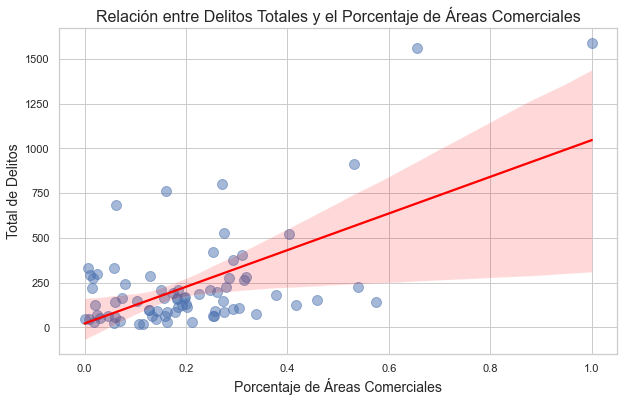

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo estético de los gráficos de Seaborn (opcional)
sns.set_theme(style="whitegrid")

# Crear un gráfico de dispersión con una línea de regresión
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='normalized_coverage', y='Total_delitos', data=areas_comunitarias_2,
                 scatter_kws={"s": 100, "alpha": 0.5}, line_kws={"color": "red"})

# Configurando títulos y etiquetas
ax.set_title('Relación entre Delitos Totales y el Porcentaje de Áreas Comerciales', fontsize=16)
ax.set_xlabel('Porcentaje de Áreas Comerciales', fontsize=14)
ax.set_ylabel('Total de Delitos', fontsize=14)

# Mostrar el gráfico
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)